<center><h1><b>5주차 ✅ 폐기물 환경오염 데이터 분석 : 수질오염</b></h1></center>


---
----

<center><h2><b>데이터 초기 전처리</b></h2></center>


### 데이터 불러오기

이거는 수질 오염 데이터
- 일단 tidy data..
- binary 처리
- category 화

In [304]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [305]:
pd.set_option('display.max_rows', 30)

In [4]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum - qq > /dev/null
        !fc-cache - fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


In [306]:
# 폴더 내 데이터 확인
from glob import glob

file_list = glob('data/water/*.csv')
file_list

['data/water/호소의_수질현황_20220609184509.csv',
 'data/water/호소의_수질현황_20220609184440.csv',
 'data/water/호소의_수질현황_20220609184529.csv',
 'data/water/호소의_수질현황_20220609184413.csv']

In [307]:
# 데이터 가져오기
dfs = [pd.read_csv(name, encoding='cp949') for name in file_list]
dfs[0].head()

,수계별(1),수계별(2),항목,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12
0,한강,화천댐1(파로호),생물화학적산소요구량 BOD (㎎/ℓ),1.1,0.7,1.8,0.9,1.9,1.2,0.6,0.5,1.0
1,한강,화천댐1(파로호),용존산소 DO (㎎/ℓ),12.4,11.1,10.0,9.7,10.2,9.0,8.6,9.8,10.0
2,한강,화천댐1(파로호),수온 (℃),6.6,12.4,15.4,19.5,22.7,18.0,18.2,13.8,10.2
3,한강,화천댐1(파로호),카드뮴 Cd (㎎/ℓ),-,-,0.00020,-,-,0.00000,-,-,0.00000
4,한강,화천댐1(파로호),시안 CN (㎎/ℓ),-,-,0.00,-,-,0.00,-,-,0.00


In [308]:
# 19년도, 20년도 끼리 병합한다.
# 하나의 연도 데이터를 만든다.
df_19_m = pd.merge(dfs[2], dfs[0])
df_20_m = pd.merge(dfs[1], dfs[3])
df_19_m.columns, df_20_m.columns

(Index(['수계별(1)', '수계별(2)', '항목', '2020.01', '2020.02', '2020.03', '2020.04',
        '2020.05', '2020.06', '2020.07', '2020.08', '2020.09', '2020.10',
        '2020.11', '2020.12'],
       dtype='object'),
 Index(['수계별(1)', '수계별(2)', '항목', '2019.01', '2019.02', '2019.03', '2019.04',
        '2019.05', '2019.06', '2019.07', '2019.08', '2019.09', '2019.10',
        '2019.11', '2019.12'],
       dtype='object'))

In [309]:
# tidy data를 만든다.
# 컬럼명을 변경한다.
cols = ['강명', '댐명', '항목', '시점', '오염지수']
df_19 = df_19_m.melt(id_vars=['수계별(1)', '수계별(2)', '항목'], var_name='시점')
df_20 = df_20_m.melt(id_vars=['수계별(1)', '수계별(2)', '항목'], var_name='시점')
df_19.columns = cols
df_20.columns = cols
df_20.head()


,강명,댐명,항목,시점,오염지수
0,한강,화천댐1(파로호),생물화학적산소요구량 BOD (㎎/ℓ),2019.01,1.0
1,한강,화천댐1(파로호),용존산소 DO (㎎/ℓ),2019.01,10.3
2,한강,화천댐1(파로호),수온 (℃),2019.01,5.3
3,한강,화천댐1(파로호),카드뮴 Cd (㎎/ℓ),2019.01,-
4,한강,화천댐1(파로호),시안 CN (㎎/ℓ),2019.01,-


In [310]:
# shape 확인
df_19.shape, df_20.shape

((21168, 5), (20280, 5))

In [311]:
# dtype 확인
df_19.dtypes

강명      object
댐명      object
항목      object
시점      object
오염지수    object
dtype: object

In [312]:
# 오염지수를 수치형 타입으로 변경한다.
df_19['오염지수'] = pd.to_numeric(df_19['오염지수'], errors='coerce', downcast='unsigned')
df_20['오염지수'] = pd.to_numeric(df_20['오염지수'], errors='coerce', downcast='unsigned')
df_19.dtypes, df_20.dtypes

(강명       object
 댐명       object
 항목       object
 시점       object
 오염지수    float64
 dtype: object,
 강명       object
 댐명       object
 항목       object
 시점       object
 오염지수    float64
 dtype: object)

In [313]:
# 결측치 데이터 확인
df_19.isnull().sum()

강명         0
댐명         0
항목         0
시점         0
오염지수    9381
dtype: int64

In [314]:
# 결측치 채워넣기
df_19['오염지수'] = df_19['오염지수'].fillna(0)
df_20['오염지수'] = df_20['오염지수'].fillna(0)
df_19.head()

,강명,댐명,항목,시점,오염지수
0,한강,화천댐1(파로호),생물화학적산소요구량 BOD (㎎/ℓ),2020.01,0.4
1,한강,화천댐1(파로호),용존산소 DO (㎎/ℓ),2020.01,10.7
2,한강,화천댐1(파로호),수온 (℃),2020.01,6.5
3,한강,화천댐1(파로호),카드뮴 Cd (㎎/ℓ),2020.01,0.0
4,한강,화천댐1(파로호),시안 CN (㎎/ℓ),2020.01,0.0


In [315]:
# 강명, 항목, 시점 기준으로 그룹을 짓는다.
# 오염지수는 평균을 사용하며 두번째 자릿수에서 올림을 한다.
df_19_g = df_19.groupby(by=['강명', '항목', '시점'], as_index=False).mean()
df_20_g = df_20.groupby(by=['강명', '항목', '시점'], as_index=False).mean()


In [316]:
# 확인
df_19_g.describe()

,오염지수
count,1512.000000
mean,2.744820
std,5.327217
min,0.000000
25%,0.000000
50%,0.000000
75%,1.933333
max,27.400000


In [317]:
# 19, 20년도 데이터를 concat 할 수 있는지 확인한다.
((df_20_g['강명'] == df_19_g['강명']) == False).sum()
((df_20_g['항목'] == df_19_g['항목']) == False).sum()

0

In [318]:
# concat을 진행한다.
water = pd.concat([df_20_g, df_19_g.loc[:, ['시점', '오염지수']]], axis=1)
water.head()

,강명,항목,시점,오염지수,시점,오염지수
0,금강,6가크롬 Cr6+ (㎎/ℓ),2019.01,0.0,2020.01,0.0
1,금강,6가크롬 Cr6+ (㎎/ℓ),2019.02,0.0,2020.02,0.0
2,금강,6가크롬 Cr6+ (㎎/ℓ),2019.03,0.0,2020.03,0.0
3,금강,6가크롬 Cr6+ (㎎/ℓ),2019.04,0.0,2020.04,0.0
4,금강,6가크롬 Cr6+ (㎎/ℓ),2019.05,0.0,2020.05,0.0


In [319]:
# 컬럼명 변경
cols = ['강명', '항목', '월', '2019', '월_', '2020']
water.columns = cols

In [320]:
# 필요없는 컬럼 삭제
del water['월_']

In [321]:
# 월 데이터를 숫자만 반환하도록 설정한다.
def find_month(x):
    # [2020.01] 이런식으로 되어있는거 자르고 0 있으면 없애기
    return x.split('.')[-1]

water['월'] = water['월'].astype('string').map(find_month)

In [322]:
# 확인
water['월'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [323]:
# 확인
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강명      1512 non-null   object 
 1   항목      1512 non-null   object 
 2   월       1512 non-null   object 
 3   2019    1512 non-null   float64
 4   2020    1512 non-null   float64
dtypes: float64(2), object(3)
memory usage: 59.2+ KB


In [324]:
# 각 데이터에 downcast를 진행한다.
ocols = water.select_dtypes('object').columns
fcols = water.select_dtypes('float').columns
water[ocols] = water[ocols].astype('category')
water[fcols] = water[fcols].apply(pd.to_numeric, downcast='float')
water.dtypes

강명      category
항목      category
월       category
2019     float32
2020     float32
dtype: object

In [325]:
water

,강명,항목,월,2019,2020
0,금강,6가크롬 Cr6+ (㎎/ℓ),01,0.0,0.0
1,금강,6가크롬 Cr6+ (㎎/ℓ),02,0.0,0.0
2,금강,6가크롬 Cr6+ (㎎/ℓ),03,0.0,0.0
3,금강,6가크롬 Cr6+ (㎎/ℓ),04,0.0,0.0
4,금강,6가크롬 Cr6+ (㎎/ℓ),05,0.0,0.0
...,...,...,...,...,...
1507,회야강,카드뮴 Cd (㎎/ℓ),08,0.0,0.0
1508,회야강,카드뮴 Cd (㎎/ℓ),09,0.0,0.0
1509,회야강,카드뮴 Cd (㎎/ℓ),10,0.0,0.0
1510,회야강,카드뮴 Cd (㎎/ℓ),11,0.0,0.0


In [326]:
# 데이터 저장
water.to_csv('output/water/water_1920.csv', index=False)

----

### 저장한 데이터 확인

이제 중금속이 들어있는지... bod 랑 do? 는 어떤지 보자..
중금속을 기준으로 그룹핑.. 평균으로 나타낼 것임. -> 그리고 한번 저장.
각 중금속 별로 불린 값.

In [327]:
# 저장한 데이터 가져오기
raw = pd.read_csv('output/water/water_1920.csv')
raw.shape

(1512, 5)

In [328]:
# 데이터 살펴보기
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강명      1512 non-null   object 
 1   항목      1512 non-null   object 
 2   월       1512 non-null   int64  
 3   2019    1512 non-null   float64
 4   2020    1512 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 59.2+ KB


In [329]:
# 데이터 살펴보기
raw.head()

,강명,항목,월,2019,2020
0,금강,6가크롬 Cr6+ (㎎/ℓ),1,0.0,0.0
1,금강,6가크롬 Cr6+ (㎎/ℓ),2,0.0,0.0
2,금강,6가크롬 Cr6+ (㎎/ℓ),3,0.0,0.0
3,금강,6가크롬 Cr6+ (㎎/ℓ),4,0.0,0.0
4,금강,6가크롬 Cr6+ (㎎/ℓ),5,0.0,0.0


In [330]:
# 데이터 살펴보기
raw.describe()

,월,2019,2020
count,1512.000000,1512.000000,1512.000000
mean,6.500000,2.783630,2.744820
std,3.453195,5.574698,5.327217
min,1.000000,0.000000,0.000000
25%,3.750000,0.000000,0.000000
50%,6.500000,0.000000,0.000000
75%,9.250000,1.969260,1.933333
max,12.000000,29.587500,27.400000


In [331]:
# 월별 중금속 평균
df = raw.groupby(by=['강명', '월', '항목'], as_index=False).mean()
df.head(20)

,강명,월,항목,2019,2020
0,금강,1,6가크롬 Cr6+ (㎎/ℓ),0.000000,0.000000
1,금강,1,납 Pb (㎎/ℓ),0.000000,0.000000
2,금강,1,비소 As (㎎/ℓ),0.000000,0.000000
3,금강,1,생물화학적산소요구량 BOD (㎎/ℓ),0.853333,1.186667
4,금강,1,수온 (℃),4.680000,5.360000
5,금강,1,수은 Hg (㎎/ℓ),0.000000,0.000000
6,금강,1,시안 CN (㎎/ℓ),0.000000,0.000000
7,금강,1,용존산소 DO (㎎/ℓ),10.646667,11.386666
8,금강,1,카드뮴 Cd (㎎/ℓ),0.000000,0.000000
9,금강,2,6가크롬 Cr6+ (㎎/ℓ),0.000000,0.000000


In [332]:
# 항목 unstack 한 데이터 프레임
df_st = raw.groupby(by=['강명', '월', '항목'],).mean().round(3).unstack('항목')
df_st.head()

2019                                                      \
항목   6가크롬 Cr6+ (㎎/ℓ) 납 Pb (㎎/ℓ) 비소 As (㎎/ℓ) 생물화학적산소요구량 BOD (㎎/ℓ)  수온 (℃)   
강명 월                                                                       
금강 1             0.0        0.0         0.0                0.853   4.680   
   2             0.0        0.0         0.0                0.853   3.500   
   3             0.0        0.0         0.0                1.767   6.487   
   4             0.0        0.0         0.0                1.513   9.747   
   5             0.0        0.0         0.0                1.540  13.093   

                                                                   2020  \
항목   수은 Hg (㎎/ℓ) 시안 CN (㎎/ℓ) 용존산소 DO (㎎/ℓ) 카드뮴 Cd (㎎/ℓ) 6가크롬 Cr6+ (㎎/ℓ)   
강명 월                                                                      
금강 1         0.0         0.0        10.647          0.0             0.0   
   2         0.0         0.0         9.827          0.0             0.0   
   3         0.0         0.0        12.667          0.0             0.0   
   4         0.0         0.0        11.647          0.0             0.0   
   5         0.0         0.0        10.340          0.0             0.0   

                                                                      \
항목   납 Pb (㎎/ℓ) 비소 As (㎎/ℓ) 생물화학적산소요구량 BOD (㎎/ℓ)  수온 (℃) 수은 Hg (㎎/ℓ)   
강명 월                                                                   
금강 1        0.0         0.0                1.187   5.360         0.0   
   2        0.0         0.0                1.693   4.620         0.0   
   3        0.0         0.0                1.540   6.087         0.0   
   4        0.0         0.0                1.087   8.340         0.0   
   5        0.0         0.0                1.160  13.047         0.0   

                                             
항목   시안 CN (㎎/ℓ) 용존산소 DO (㎎/ℓ) 카드뮴 Cd (㎎/ℓ)  
강명 월                                         
금강 1         0.0        11.387          0.0  
   2         0.0        12.167          0.0  
   3         0.0        12.093          0.0  
   4         0.0        10.920          0.0  
   5         0.0         9.387          0.0

In [333]:
df.head()

,강명,월,항목,2019,2020
0,금강,1,6가크롬 Cr6+ (㎎/ℓ),0.000000,0.000000
1,금강,1,납 Pb (㎎/ℓ),0.000000,0.000000
2,금강,1,비소 As (㎎/ℓ),0.000000,0.000000
3,금강,1,생물화학적산소요구량 BOD (㎎/ℓ),0.853333,1.186667
4,금강,1,수온 (℃),4.680000,5.360000


----

### 중금속 데이터 전처리

중금속 있다 없다...
bod, od grade..

In [334]:
# 중금속 찾기 위해 컬럼 확인한다.
df['항목'].unique()

array(['6가크롬 Cr6+ (㎎/ℓ)', '납 Pb (㎎/ℓ)', '비소 As (㎎/ℓ)',
       '생물화학적산소요구량 BOD (㎎/ℓ)', '수온 (℃)', '수은 Hg (㎎/ℓ)', '시안 CN (㎎/ℓ)',
       '용존산소 DO (㎎/ℓ)', '카드뮴 Cd (㎎/ℓ)'], dtype=object)

In [335]:
# 중금속 컬럼만 추출한다.
metal_cols = [
    '6가크롬 Cr6+ (㎎/ℓ)', '납 Pb (㎎/ℓ)', '비소 As (㎎/ℓ)',
    '수은 Hg (㎎/ℓ)', '시안 CN (㎎/ℓ)', '카드뮴 Cd (㎎/ℓ)']
metal_cols

['6가크롬 Cr6+ (㎎/ℓ)',
 '납 Pb (㎎/ℓ)',
 '비소 As (㎎/ℓ)',
 '수은 Hg (㎎/ℓ)',
 '시안 CN (㎎/ℓ)',
 '카드뮴 Cd (㎎/ℓ)']

In [336]:
df_metal = df[df['항목'].isin(metal_cols)].copy()
df_metal

,강명,월,항목,2019,2020
0,금강,1,6가크롬 Cr6+ (㎎/ℓ),0.0,0.000
1,금강,1,납 Pb (㎎/ℓ),0.0,0.000
2,금강,1,비소 As (㎎/ℓ),0.0,0.000
5,금강,1,수은 Hg (㎎/ℓ),0.0,0.000
6,금강,1,시안 CN (㎎/ℓ),0.0,0.000
...,...,...,...,...,...
1504,회야강,12,납 Pb (㎎/ℓ),0.0,0.000
1505,회야강,12,비소 As (㎎/ℓ),0.0,0.001
1508,회야강,12,수은 Hg (㎎/ℓ),0.0,0.000
1509,회야강,12,시안 CN (㎎/ℓ),0.0,0.000


In [337]:
df_metal_ = df_metal.groupby(by=['강명', '항목'], as_index=False).mean().drop(columns='월')
df_metal_.head()

,강명,항목,2019,2020
0,금강,6가크롬 Cr6+ (㎎/ℓ),0.0,0.000000e+00
1,금강,납 Pb (㎎/ℓ),0.0,0.000000e+00
2,금강,비소 As (㎎/ℓ),0.0,0.000000e+00
3,금강,수은 Hg (㎎/ℓ),0.0,8.483333e-07
4,금강,시안 CN (㎎/ℓ),0.0,0.000000e+00


In [338]:
df_metal_['2019'] != 0


0     False
1     False
2     False
3     False
4     False
      ...  
79    False
80     True
81    False
82    False
83    False
Name: 2019, Length: 84, dtype: bool

In [339]:
(df_metal_['2019'] != 0).map(lambda x: 1 if x else 0)


0     0
1     0
2     0
3     0
4     0
     ..
79    0
80    1
81    0
82    0
83    0
Name: 2019, Length: 84, dtype: int64

In [340]:
df_metal_['19년_중금속'] = (df_metal_['2019'] != 0).map(lambda x: 1 if x else 0)
df_metal_['20년_중금속'] = (df_metal_['2020'] != 0).map(lambda x: 1 if x else 0)
df_metal_

,강명,항목,2019,2020,19년_중금속,20년_중금속
0,금강,6가크롬 Cr6+ (㎎/ℓ),0.000,0.000000e+00,0,0
1,금강,납 Pb (㎎/ℓ),0.000,0.000000e+00,0,0
2,금강,비소 As (㎎/ℓ),0.000,0.000000e+00,0,0
3,금강,수은 Hg (㎎/ℓ),0.000,8.483333e-07,0,1
4,금강,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0
...,...,...,...,...,...,...
79,회야강,납 Pb (㎎/ℓ),0.000,4.958333e-05,0,1
80,회야강,비소 As (㎎/ℓ),0.001,1.838333e-03,1,1
81,회야강,수은 Hg (㎎/ℓ),0.000,4.166667e-07,0,1
82,회야강,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0


In [341]:
df_metal_ = df_metal_.reset_index(drop=True)
df_metal_.tail(2)

,강명,항목,2019,2020,19년_중금속,20년_중금속
82,회야강,시안 CN (㎎/ℓ),0.0,0.0,0,0
83,회야강,카드뮴 Cd (㎎/ℓ),0.0,0.0,0,0


In [342]:
df_metal_.to_csv('output/water/water_metal_1920.csv', index=False)

In [ ]:
# df['19년_중금속'] = df.loc[df['항목'].isin(metal_cols), '2019'] != 0
# df['20년_중금속'] = df.loc[df['항목'].isin(metal_cols), '2020'] != 0
# df.head()

In [345]:
df_metal_

,강명,항목,2019,2020,19년_중금속,20년_중금속
0,금강,6가크롬 Cr6+ (㎎/ℓ),0.000,0.000000e+00,0,0
1,금강,납 Pb (㎎/ℓ),0.000,0.000000e+00,0,0
2,금강,비소 As (㎎/ℓ),0.000,0.000000e+00,0,0
3,금강,수은 Hg (㎎/ℓ),0.000,8.483333e-07,0,1
4,금강,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0
...,...,...,...,...,...,...
79,회야강,납 Pb (㎎/ℓ),0.000,4.958333e-05,0,1
80,회야강,비소 As (㎎/ℓ),0.001,1.838333e-03,1,1
81,회야강,수은 Hg (㎎/ℓ),0.000,4.166667e-07,0,1
82,회야강,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0


In [344]:
df_metal_.groupby('강명').sum()

,2019,2020,19년_중금속,20년_중금속
강명,,,,
금강,0.000000,8.483333e-07,0,1
기타,0.000887,6.303651e-04,3,4
낙동강,0.000081,9.622222e-05,2,1
만경강,0.000000,1.300000e-05,0,3
삽교천,0.000000,0.000000e+00,0,0
섬진강,0.000045,5.090641e-05,4,4
수어천,0.000000,0.000000e+00,0,0
안성천,0.000000,4.166667e-05,0,1
영산강,0.000000,0.000000e+00,0,0


---

### 수질등급 전처리

In [232]:
# 수질 등급 평가기준
# https://m.water.or.kr/knowledge/educate/general/general01_qna0103.contents
def grade(bod, od):
    if bod <= 1 and od >= 7.5:
        return '1(매우좋음Ia)'
    elif bod <= 2 and od >= 5.0:
        return '2(좋음Ib)'
    elif bod <= 3 and od >= 5.0:
        return '3(약간좋음II)'
    elif bod <= 5 and od >= 5.0:
        return '4(보통III)'
    elif bod <= 8 and od >= 2.0:
        return '5(약간나쁨IV)'
    elif bod <= 10 and od >= 2.0:
        return '6(나쁨V)'
    elif bod > 10 and od >= 2.0:
        return '7(매우나쁨VI)'
    

In [234]:
# df[~(df['항목'].isin(metal_cols))]
o2_cols = ['생물화학적산소요구량 BOD (㎎/ℓ)', '용존산소 DO (㎎/ℓ)']
o2_cols


['생물화학적산소요구량 BOD (㎎/ℓ)', '용존산소 DO (㎎/ℓ)']

In [235]:
df_o2 = df[df['항목'].isin(o2_cols)]
df_o2.head()

,강명,월,항목,2019,2020
3,금강,1,생물화학적산소요구량 BOD (㎎/ℓ),0.85,1.19
7,금강,1,용존산소 DO (㎎/ℓ),10.65,11.39
12,금강,2,생물화학적산소요구량 BOD (㎎/ℓ),0.85,1.69
16,금강,2,용존산소 DO (㎎/ℓ),9.83,12.17
21,금강,3,생물화학적산소요구량 BOD (㎎/ℓ),1.77,1.54


In [236]:
def enumerate2(xs, start=0, step=1):
    for x in xs:
        yield (start, x)
        start += step


In [237]:
for i, bst in enumerate2(df_o2.index[::2], step=2):
    df_o2_ = df_o2.copy()
    bod_19 = df_o2_.iloc[i]['2019']
    od_19 = df_o2_.iloc[i+1]['2019']
    bod_20 = df_o2_.iloc[i]['2020']
    od_20 = df_o2_.iloc[i+1]['2020']

    df_o2_.loc[bst, '19년_수질'] = grade(bod_19, od_19)
    df_o2_.loc[bst+4, '19년_수질'] = grade(bod_19, od_19)
    df_o2_.loc[bst, '20년_수질'] = grade(bod_20, od_20)
    df_o2_.loc[bst+4, '20년_수질'] = grade(bod_20, od_20)
    
    # print(bst, grade(bod_19, od_19), df_o2_.loc[bst, '19년_수질'])
    # print()

    df_o2 = df_o2_.copy()

In [240]:
df_o2.tail()

,강명,월,항목,2019,2020,19년_수질,20년_수질
1492,회야강,10,용존산소 DO (㎎/ℓ),7.20,7.60,2(좋음Ib),1(매우좋음Ia)
1497,회야강,11,생물화학적산소요구량 BOD (㎎/ℓ),1.55,1.50,2(좋음Ib),2(좋음Ib)
1501,회야강,11,용존산소 DO (㎎/ℓ),7.40,8.65,2(좋음Ib),2(좋음Ib)
1506,회야강,12,생물화학적산소요구량 BOD (㎎/ℓ),0.70,0.70,1(매우좋음Ia),1(매우좋음Ia)
1510,회야강,12,용존산소 DO (㎎/ℓ),9.85,9.75,1(매우좋음Ia),1(매우좋음Ia)


In [241]:
df_o2 = df_o2.reset_index(drop=True)
df_o2.tail()

,강명,월,항목,2019,2020,19년_수질,20년_수질
331,회야강,10,용존산소 DO (㎎/ℓ),7.20,7.60,2(좋음Ib),1(매우좋음Ia)
332,회야강,11,생물화학적산소요구량 BOD (㎎/ℓ),1.55,1.50,2(좋음Ib),2(좋음Ib)
333,회야강,11,용존산소 DO (㎎/ℓ),7.40,8.65,2(좋음Ib),2(좋음Ib)
334,회야강,12,생물화학적산소요구량 BOD (㎎/ℓ),0.70,0.70,1(매우좋음Ia),1(매우좋음Ia)
335,회야강,12,용존산소 DO (㎎/ℓ),9.85,9.75,1(매우좋음Ia),1(매우좋음Ia)


In [242]:
df_o2.to_csv('output/water/water_od_1920.csv', index=False)

---

### 기타...잉여물

In [638]:
# 중금속
df_metal = df.loc[df['항목'].isin(metal_cols)]
df


,강명,월,항목,2019,2020
0,금강,1,6가크롬 Cr6+ (㎎/ℓ),0.00,0.00
1,금강,1,납 Pb (㎎/ℓ),0.00,0.00
2,금강,1,비소 As (㎎/ℓ),0.00,0.00
4,금강,1,수온 (℃),4.68,5.36
5,금강,1,수은 Hg (㎎/ℓ),0.00,0.00
...,...,...,...,...,...
1505,회야강,12,비소 As (㎎/ℓ),0.00,0.00
1507,회야강,12,수온 (℃),10.20,10.45
1508,회야강,12,수은 Hg (㎎/ℓ),0.00,0.00
1509,회야강,12,시안 CN (㎎/ℓ),0.00,0.00


In [345]:
# 중금속이 있는지 아닌지
# df['중금속_20'] = df.loc[df['항목'].isin(metal), '오염지수_20'] != 0
# df['중금속_19'] = df.loc[df['항목'].isin(metal), '오염지수_19'] != 0

In [373]:
# 중금속만
metal_df = df[(df['항목'].isin(metal))]
metal_df

,강명,항목,2020,오염지수_20,2019,오염지수_19
0,금강,6가크롬 Cr6+ (㎎/ℓ),2020.06,0.00,2019.06,0.00
1,금강,납 Pb (㎎/ℓ),2020.06,0.00,2019.06,0.00
2,금강,비소 As (㎎/ℓ),2020.06,0.00,2019.06,0.00
4,금강,수온 (℃),2020.06,11.61,2019.06,11.85
5,금강,수은 Hg (㎎/ℓ),2020.06,0.00,2019.06,0.00
...,...,...,...,...,...,...
119,회야강,비소 As (㎎/ℓ),2020.06,0.00,2019.06,0.00
121,회야강,수온 (℃),2020.06,12.06,2019.06,15.83
122,회야강,수은 Hg (㎎/ℓ),2020.06,0.00,2019.06,0.00
123,회야강,시안 CN (㎎/ℓ),2020.06,0.00,2019.06,0.00


In [374]:
# 중금속 합치기
metal_df = metal_df.groupby('강명', as_index=False).sum()
metal_df


,강명,2020,오염지수_20,2019,오염지수_19
0,금강,14140.42,11.61,14133.42,11.85
1,기타,14140.42,14.61,14133.42,14.77
2,낙동강,14140.42,13.26,14133.42,13.27
3,만경강,14140.42,12.78,14133.42,12.82
4,삽교천,14140.42,14.07,14133.42,13.14
5,섬진강,14140.42,13.74,14133.42,12.84
6,수어천,14140.42,15.15,14133.42,16.45
7,안성천,14140.42,14.98,14133.42,15.40
8,영산강,14140.42,13.84,14133.42,14.71
9,탐진강,14140.42,14.22,14133.42,13.71


In [375]:
metal_df['중금속_20'] = metal_df['오염지수_20'] != 0
metal_df['중금속_19'] = metal_df['오염지수_19'] != 0
metal_df

,강명,2020,오염지수_20,2019,오염지수_19,중금속_20,중금속_19
0,금강,14140.42,11.61,14133.42,11.85,True,True
1,기타,14140.42,14.61,14133.42,14.77,True,True
2,낙동강,14140.42,13.26,14133.42,13.27,True,True
3,만경강,14140.42,12.78,14133.42,12.82,True,True
4,삽교천,14140.42,14.07,14133.42,13.14,True,True
5,섬진강,14140.42,13.74,14133.42,12.84,True,True
6,수어천,14140.42,15.15,14133.42,16.45,True,True
7,안성천,14140.42,14.98,14133.42,15.40,True,True
8,영산강,14140.42,13.84,14133.42,14.71,True,True
9,탐진강,14140.42,14.22,14133.42,13.71,True,True


In [425]:
# 그외만
o_df = df[~(df['항목'].isin(metal))]
o_df.head()


,강명,항목,2020,오염지수_20,2019,오염지수_19
3,금강,생물화학적산소요구량 BOD (㎎/ℓ),2020.06,1.45,2019.06,1.43
7,금강,용존산소 DO (㎎/ℓ),2020.06,9.36,2019.06,8.91
12,기타,생물화학적산소요구량 BOD (㎎/ℓ),2020.06,2.66,2019.06,2.97
16,기타,용존산소 DO (㎎/ℓ),2020.06,9.94,2019.06,9.37
21,낙동강,생물화학적산소요구량 BOD (㎎/ℓ),2020.06,1.40,2019.06,1.49


In [434]:
o_df_pt_19 = pd.pivot_table(o_df, index=['강명'], columns='항목', values='오염지수_19')
o_df_pt_19


항목,생물화학적산소요구량 BOD (㎎/ℓ),용존산소 DO (㎎/ℓ)
강명,,
금강,1.43,8.91
기타,2.97,9.37
낙동강,1.49,9.09
만경강,0.70,10.06
삽교천,3.25,8.59
섬진강,1.50,8.98
수어천,1.23,9.26
안성천,2.26,9.00
영산강,1.22,10.35


In [439]:
o_df_pt_20 = pd.pivot_table(o_df, index=['강명'], columns='항목', values='오염지수_20')
o_df_pt_20

항목,생물화학적산소요구량 BOD (㎎/ℓ),용존산소 DO (㎎/ℓ)
강명,,
금강,1.45,9.36
기타,2.66,9.94
낙동강,1.40,8.86
만경강,0.64,9.71
삽교천,2.70,11.49
섬진강,1.50,9.28
수어천,1.23,9.37
안성천,2.36,10.23
영산강,1.33,10.20


In [430]:
# 수질 등급 평가기준
def grade(bod, do):
    if bod <= 1 and do >= 7.5:
        return '1(매우좋음Ia)'
    elif bod <= 2 and do >= 5.0:
        return '2(좋음Ib)'
    elif bod <= 3 and do >= 5.0:
        return '3(약간좋음II)'
    elif bod <= 5 and do >= 5.0:
        return '4(보통III)'
    elif bod <= 8 and do >= 2.0:
        return '5(약간나쁨IV)'
    elif bod <= 10 and do >= 2.0:
        return '6(나쁨V)'
    elif bod > 10 and do >= 2.0:
        return '7(매우나쁨VI)'
    

In [435]:
for bst in o_df_pt_19.index:
    row = o_df_pt_19.loc[bst]
    o_df_pt_19.loc[bst, '2019년도'] = grade(row[0], row[1])

o_df_pt_19


항목,생물화학적산소요구량 BOD (㎎/ℓ),용존산소 DO (㎎/ℓ),2019년도
강명,,,
금강,1.43,8.91,2(좋음Ib)
기타,2.97,9.37,3(약간좋음II)
낙동강,1.49,9.09,2(좋음Ib)
만경강,0.70,10.06,1(매우좋음Ia)
삽교천,3.25,8.59,4(보통III)
섬진강,1.50,8.98,2(좋음Ib)
수어천,1.23,9.26,2(좋음Ib)
안성천,2.26,9.00,3(약간좋음II)
영산강,1.22,10.35,2(좋음Ib)


In [440]:
for bst in o_df_pt_20.index:
    row = o_df_pt_20.loc[bst]
    o_df_pt_20.loc[bst, '2020년도'] = grade(row[0], row[1])

o_df_pt_20


항목,생물화학적산소요구량 BOD (㎎/ℓ),용존산소 DO (㎎/ℓ),2020년도
강명,,,
금강,1.45,9.36,2(좋음Ib)
기타,2.66,9.94,3(약간좋음II)
낙동강,1.40,8.86,2(좋음Ib)
만경강,0.64,9.71,1(매우좋음Ia)
삽교천,2.70,11.49,3(약간좋음II)
섬진강,1.50,9.28,2(좋음Ib)
수어천,1.23,9.37,2(좋음Ib)
안성천,2.36,10.23,3(약간좋음II)
영산강,1.33,10.20,2(좋음Ib)


In [445]:
o_df_pt_19 = o_df_pt_19.reset_index()
o_df_pt_20 = o_df_pt_20.reset_index()

In [449]:
o_df_pt_20.loc[:, '2020년도']


0       2(좋음Ib)
1     3(약간좋음II)
2       2(좋음Ib)
3     1(매우좋음Ia)
4     3(약간좋음II)
5       2(좋음Ib)
6       2(좋음Ib)
7     3(약간좋음II)
8       2(좋음Ib)
9       2(좋음Ib)
10    1(매우좋음Ia)
11      2(좋음Ib)
12    3(약간좋음II)
13      2(좋음Ib)
Name: 2020년도, dtype: object

In [452]:
pd.concat([o_df_pt_19, o_df_pt_20.loc[:, '2020년도']], axis=1)

,강명,생물화학적산소요구량 BOD (㎎/ℓ),용존산소 DO (㎎/ℓ),2019년도,2020년도
0,금강,1.43,8.91,2(좋음Ib),2(좋음Ib)
1,기타,2.97,9.37,3(약간좋음II),3(약간좋음II)
2,낙동강,1.49,9.09,2(좋음Ib),2(좋음Ib)
3,만경강,0.70,10.06,1(매우좋음Ia),1(매우좋음Ia)
4,삽교천,3.25,8.59,4(보통III),3(약간좋음II)
5,섬진강,1.50,8.98,2(좋음Ib),2(좋음Ib)
6,수어천,1.23,9.26,2(좋음Ib),2(좋음Ib)
7,안성천,2.26,9.00,3(약간좋음II),3(약간좋음II)
8,영산강,1.22,10.35,2(좋음Ib),2(좋음Ib)
9,탐진강,2.22,9.21,3(약간좋음II),2(좋음Ib)


-----

### 시도명 + 강

In [346]:
metal_raw = pd.read_csv('output/water/water_metal_1920.csv')
metal_raw.head()

,강명,항목,2019,2020,19년_중금속,20년_중금속
0,금강,6가크롬 Cr6+ (㎎/ℓ),0.0,0.000000e+00,0,0
1,금강,납 Pb (㎎/ℓ),0.0,0.000000e+00,0,0
2,금강,비소 As (㎎/ℓ),0.0,0.000000e+00,0,0
3,금강,수은 Hg (㎎/ℓ),0.0,8.483333e-07,0,1
4,금강,시안 CN (㎎/ℓ),0.0,0.000000e+00,0,0


In [389]:
rivers = {
'한강':['서울특별시', '인천광역시', '경기도', '충청북도', '강원도'],
'낙동강':['부산광역시', '대구광역시', '강원도', '경상북도', '경상남도'],
'금강':['전라북도','충청북도','대전광역시','세종특별자치시','충청남도'],
'영산강':'광주광역시',
'만경강': '전라북도',
'삽교천': '충청남도',
'섬진강': '전라북도',
'수어천': '전라남도',
'안성천': '경기도',
'탐진강': '전라남도',
'태화강': '울산광역시',
'형산강': '경상북도',
'회야강': '경상남도'
}


In [ ]:
rivers_ = {
'한강':'서울특별시',
'낙동강':'부산광역시',
'금강':'대전광역시',
'영산강':'광주광역시',
'만경강': '전라북도',
'삽교천': '충청남도',
'섬진강': '전라북도',
'수어천': '전라남도',
'안성천': '경기도',
'탐진강': '전라남도',
'태화강': '울산광역시',
'형산강': '경상북도',
'회야강': '경상남도'
}


In [355]:
metal_raw.head()

,강명,항목,2019,2020,19년_중금속,20년_중금속
0,금강,6가크롬 Cr6+ (㎎/ℓ),0.0,0.000000e+00,0,0
1,금강,납 Pb (㎎/ℓ),0.0,0.000000e+00,0,0
2,금강,비소 As (㎎/ℓ),0.0,0.000000e+00,0,0
3,금강,수은 Hg (㎎/ℓ),0.0,8.483333e-07,0,1
4,금강,시안 CN (㎎/ℓ),0.0,0.000000e+00,0,0


In [ ]:
pd.pivot_table(metal_raw, index=['강명'], columns=['항목'],  aggfunc='mean')


#### 한강

In [378]:
rivers['한강']

['서울특별시', '경기도', '충청북도', '강원도']

In [390]:
# 한강 데이터프레임만 뽑기
han = metal_raw[metal_raw['강명'] == '한강']
han.head()


,강명,항목,2019,2020,19년_중금속,20년_중금속
66,한강,6가크롬 Cr6+ (㎎/ℓ),0.000000e+00,0.000000e+00,0,0
67,한강,납 Pb (㎎/ℓ),2.315952e-04,2.454286e-04,1,1
68,한강,비소 As (㎎/ℓ),9.016667e-05,1.106190e-04,1,1
69,한강,수은 Hg (㎎/ℓ),1.214286e-07,1.559524e-07,1,1
70,한강,시안 CN (㎎/ℓ),0.000000e+00,0.000000e+00,0,0


In [391]:
# 한강과 매핑되는 시도
han_sido = pd.DataFrame({
    '강명': ['한강' for _ in range(len(rivers['한강']))],
    '시도명': rivers['한강']})
han_sido

,강명,시도명
0,한강,서울특별시
1,한강,인천광역시
2,한강,경기도
3,한강,충청북도
4,한강,강원도


In [393]:
df_han = pd.merge(han_sido, han)
df_han.tail()

,강명,시도명,항목,2019,2020,19년_중금속,20년_중금속
25,한강,강원도,납 Pb (㎎/ℓ),2.315952e-04,2.454286e-04,1,1
26,한강,강원도,비소 As (㎎/ℓ),9.016667e-05,1.106190e-04,1,1
27,한강,강원도,수은 Hg (㎎/ℓ),1.214286e-07,1.559524e-07,1,1
28,한강,강원도,시안 CN (㎎/ℓ),0.000000e+00,0.000000e+00,0,0
29,한강,강원도,카드뮴 Cd (㎎/ℓ),4.547619e-06,1.028571e-05,1,1


#### 낙동강

In [395]:
# 낙동강 데이터 프레임만 뽑기
nak = metal_raw[metal_raw['강명'] == '낙동강']
nak.head()

,강명,항목,2019,2020,19년_중금속,20년_중금속
12,낙동강,6가크롬 Cr6+ (㎎/ℓ),0.000029,0.000000,1,0
13,낙동강,납 Pb (㎎/ℓ),0.000052,0.000096,1,1
14,낙동강,비소 As (㎎/ℓ),0.000000,0.000000,0,0
15,낙동강,수은 Hg (㎎/ℓ),0.000000,0.000000,0,0
16,낙동강,시안 CN (㎎/ℓ),0.000000,0.000000,0,0


In [396]:
# 한강과 매핑되는 시도
nak_sido = pd.DataFrame({
    '강명': ['낙동강' for _ in range(len(rivers['낙동강']))],
    '시도명': rivers['낙동강']})
nak_sido


,강명,시도명
0,낙동강,부산광역시
1,낙동강,대구광역시
2,낙동강,강원도
3,낙동강,경상북도
4,낙동강,경상남도


In [408]:
df_nak = pd.merge(nak_sido, nak)
df_nak.tail()

,강명,시도명,항목,2019,2020,19년_중금속,20년_중금속
25,낙동강,경상남도,납 Pb (㎎/ℓ),0.000052,0.000096,1,1
26,낙동강,경상남도,비소 As (㎎/ℓ),0.000000,0.000000,0,0
27,낙동강,경상남도,수은 Hg (㎎/ℓ),0.000000,0.000000,0,0
28,낙동강,경상남도,시안 CN (㎎/ℓ),0.000000,0.000000,0,0
29,낙동강,경상남도,카드뮴 Cd (㎎/ℓ),0.000000,0.000000,0,0


#### 금강

In [401]:
# 금강 데이터 프레임만 뽑기
geum = metal_raw[metal_raw['강명'] == '금강']
geum.head()

,강명,항목,2019,2020,19년_중금속,20년_중금속
0,금강,6가크롬 Cr6+ (㎎/ℓ),0.0,0.000000e+00,0,0
1,금강,납 Pb (㎎/ℓ),0.0,0.000000e+00,0,0
2,금강,비소 As (㎎/ℓ),0.0,0.000000e+00,0,0
3,금강,수은 Hg (㎎/ℓ),0.0,8.483333e-07,0,1
4,금강,시안 CN (㎎/ℓ),0.0,0.000000e+00,0,0


In [402]:
# 한강과 매핑되는 시도
geum_sido = pd.DataFrame({
    '강명': ['금강' for _ in range(len(rivers['금강']))],
    '시도명': rivers['금강']})
geum_sido


,강명,시도명
0,금강,전라북도
1,금강,충청북도
2,금강,대전광역시
3,금강,세종특별자치시
4,금강,충청남도


In [409]:
df_geum = pd.merge(geum_sido, geum)
df_geum.tail()

,강명,시도명,항목,2019,2020,19년_중금속,20년_중금속
25,금강,충청남도,납 Pb (㎎/ℓ),0.0,0.000000e+00,0,0
26,금강,충청남도,비소 As (㎎/ℓ),0.0,0.000000e+00,0,0
27,금강,충청남도,수은 Hg (㎎/ℓ),0.0,8.483333e-07,0,1
28,금강,충청남도,시안 CN (㎎/ℓ),0.0,0.000000e+00,0,0
29,금강,충청남도,카드뮴 Cd (㎎/ℓ),0.0,0.000000e+00,0,0


#### 그외

In [418]:
# 한강, 낙동강, 금강 이외의 강들
etc = metal_raw[~(metal_raw['강명'].isin(['한강', '낙동강', '금강', '기타']))].copy()
etc

,강명,항목,2019,2020,19년_중금속,20년_중금속
18,만경강,6가크롬 Cr6+ (㎎/ℓ),0.000,0.000000e+00,0,0
19,만경강,납 Pb (㎎/ℓ),0.000,8.333333e-07,0,1
20,만경강,비소 As (㎎/ℓ),0.000,1.200000e-05,0,1
21,만경강,수은 Hg (㎎/ℓ),0.000,0.000000e+00,0,0
22,만경강,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0
...,...,...,...,...,...,...
79,회야강,납 Pb (㎎/ℓ),0.000,4.958333e-05,0,1
80,회야강,비소 As (㎎/ℓ),0.001,1.838333e-03,1,1
81,회야강,수은 Hg (㎎/ℓ),0.000,4.166667e-07,0,1
82,회야강,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0


In [419]:
etc['시도명'] = etc['강명'].map(rivers)
etc

,강명,항목,2019,2020,19년_중금속,20년_중금속,시도명
18,만경강,6가크롬 Cr6+ (㎎/ℓ),0.000,0.000000e+00,0,0,전라북도
19,만경강,납 Pb (㎎/ℓ),0.000,8.333333e-07,0,1,전라북도
20,만경강,비소 As (㎎/ℓ),0.000,1.200000e-05,0,1,전라북도
21,만경강,수은 Hg (㎎/ℓ),0.000,0.000000e+00,0,0,전라북도
22,만경강,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0,전라북도
...,...,...,...,...,...,...,...
79,회야강,납 Pb (㎎/ℓ),0.000,4.958333e-05,0,1,경상남도
80,회야강,비소 As (㎎/ℓ),0.001,1.838333e-03,1,1,경상남도
81,회야강,수은 Hg (㎎/ℓ),0.000,4.166667e-07,0,1,경상남도
82,회야강,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0,경상남도


In [423]:
cols = ['강명','시도명', '항목', '2019', '2020', '19년_중금속', '20년_중금속', ]
etc = etc[cols]
etc

,강명,시도명,항목,2019,2020,19년_중금속,20년_중금속
18,만경강,전라북도,6가크롬 Cr6+ (㎎/ℓ),0.000,0.000000e+00,0,0
19,만경강,전라북도,납 Pb (㎎/ℓ),0.000,8.333333e-07,0,1
20,만경강,전라북도,비소 As (㎎/ℓ),0.000,1.200000e-05,0,1
21,만경강,전라북도,수은 Hg (㎎/ℓ),0.000,0.000000e+00,0,0
22,만경강,전라북도,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0
...,...,...,...,...,...,...,...
79,회야강,경상남도,납 Pb (㎎/ℓ),0.000,4.958333e-05,0,1
80,회야강,경상남도,비소 As (㎎/ℓ),0.001,1.838333e-03,1,1
81,회야강,경상남도,수은 Hg (㎎/ℓ),0.000,4.166667e-07,0,1
82,회야강,경상남도,시안 CN (㎎/ℓ),0.000,0.000000e+00,0,0


In [425]:
cols = ['시도명','강명', '항목', '2019', '2020', '19년_중금속', '20년_중금속', ]
metal_river = pd.concat([df_han, df_geum, df_nak, etc])
metal_river = metal_river[cols]
metal_river

,시도명,강명,항목,2019,2020,19년_중금속,20년_중금속
0,서울특별시,한강,6가크롬 Cr6+ (㎎/ℓ),0.000000e+00,0.000000e+00,0,0
1,서울특별시,한강,납 Pb (㎎/ℓ),2.315952e-04,2.454286e-04,1,1
2,서울특별시,한강,비소 As (㎎/ℓ),9.016667e-05,1.106190e-04,1,1
3,서울특별시,한강,수은 Hg (㎎/ℓ),1.214286e-07,1.559524e-07,1,1
4,서울특별시,한강,시안 CN (㎎/ℓ),0.000000e+00,0.000000e+00,0,0
...,...,...,...,...,...,...,...
79,경상남도,회야강,납 Pb (㎎/ℓ),0.000000e+00,4.958333e-05,0,1
80,경상남도,회야강,비소 As (㎎/ℓ),1.000000e-03,1.838333e-03,1,1
81,경상남도,회야강,수은 Hg (㎎/ℓ),0.000000e+00,4.166667e-07,0,1
82,경상남도,회야강,시안 CN (㎎/ℓ),0.000000e+00,0.000000e+00,0,0


In [426]:
metal_river.to_csv('output/water/water_metal_sido.csv', index=False)

#### mean, median, max, min

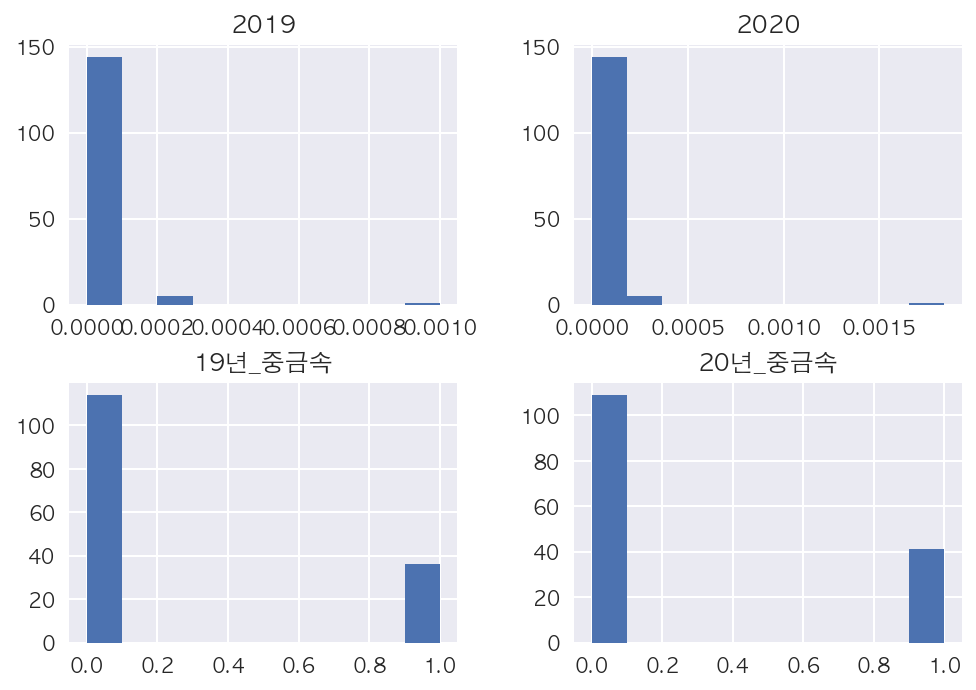

In [430]:
_ = metal_river.hist()

In [431]:
metal_river.describe()

,2019,2020,19년_중금속,20년_중금속
count,150.000000,1.500000e+02,150.000000,150.000000
mean,0.000021,2.874470e-05,0.240000,0.273333
std,0.000092,1.569750e-04,0.428514,0.447164
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000
75%,0.000000,1.559524e-07,0.000000,1.000000
max,0.001000,1.838333e-03,1.000000,1.000000


In [453]:
metal_river_ = metal_river.drop(columns=['19년_중금속', '20년_중금속'])
metal_river_.head()

,시도명,강명,항목,2019,2020
0,서울특별시,한강,6가크롬 Cr6+ (㎎/ℓ),0.000000e+00,0.000000e+00
1,서울특별시,한강,납 Pb (㎎/ℓ),2.315952e-04,2.454286e-04
2,서울특별시,한강,비소 As (㎎/ℓ),9.016667e-05,1.106190e-04
3,서울특별시,한강,수은 Hg (㎎/ℓ),1.214286e-07,1.559524e-07
4,서울특별시,한강,시안 CN (㎎/ℓ),0.000000e+00,0.000000e+00


In [486]:
# 평균
metal_mean = metal_river_.groupby(by=['시도명', '항목']).mean()
metal_mean = metal_mean.rename(columns={
    '2019':'19년_중금속_평균',
    '2020': '20년_중금속_평균'})
metal_mean.head(20)

19년_중금속_평균    20년_중금속_평균
시도명  항목                                         
강원도  6가크롬 Cr6+ (㎎/ℓ)  1.449275e-05  0.000000e+00
     납 Pb (㎎/ℓ)       1.417215e-04  1.708254e-04
     비소 As (㎎/ℓ)      4.508333e-05  5.530952e-05
     수은 Hg (㎎/ℓ)      6.071429e-08  7.797619e-08
     시안 CN (㎎/ℓ)      0.000000e+00  0.000000e+00
     카드뮴 Cd (㎎/ℓ)     2.273810e-06  5.142857e-06
경기도  6가크롬 Cr6+ (㎎/ℓ)  0.000000e+00  2.083333e-05
     납 Pb (㎎/ℓ)       1.157976e-04  1.227143e-04
     비소 As (㎎/ℓ)      4.508333e-05  5.530952e-05
     수은 Hg (㎎/ℓ)      6.071429e-08  7.797619e-08
     시안 CN (㎎/ℓ)      0.000000e+00  0.000000e+00
     카드뮴 Cd (㎎/ℓ)     2.273810e-06  5.142857e-06
경상남도 6가크롬 Cr6+ (㎎/ℓ)  1.449275e-05  0.000000e+00
     납 Pb (㎎/ℓ)       2.592391e-05  7.290278e-05
     비소 As (㎎/ℓ)      5.000000e-04  9.191667e-04
     수은 Hg (㎎/ℓ)      0.000000e+00  2.083333e-07
     시안 CN (㎎/ℓ)      0.000000e+00  0.000000e+00
     카드뮴 Cd (㎎/ℓ)     0.000000e+00  0.000000e+00
경상북도 6가크롬 Cr6+ (㎎/ℓ)  1.449275e-05  0.000000e+00
     납 Pb (㎎/ℓ)       2.592391e-05  4.811111e-05

In [487]:
# 중앙값
metal_median = metal_river_.groupby(by=['시도명', '항목']).median()
metal_median = metal_median.rename(columns={
    '2019':'19년_중금속_중앙치',
    '2020': '20년_중금속_중앙치'})
metal_median.head(20)

19년_중금속_중앙치   20년_중금속_중앙치
시도명  항목                                         
강원도  6가크롬 Cr6+ (㎎/ℓ)  1.449275e-05  0.000000e+00
     납 Pb (㎎/ℓ)       1.417215e-04  1.708254e-04
     비소 As (㎎/ℓ)      4.508333e-05  5.530952e-05
     수은 Hg (㎎/ℓ)      6.071429e-08  7.797619e-08
     시안 CN (㎎/ℓ)      0.000000e+00  0.000000e+00
     카드뮴 Cd (㎎/ℓ)     2.273810e-06  5.142857e-06
경기도  6가크롬 Cr6+ (㎎/ℓ)  0.000000e+00  2.083333e-05
     납 Pb (㎎/ℓ)       1.157976e-04  1.227143e-04
     비소 As (㎎/ℓ)      4.508333e-05  5.530952e-05
     수은 Hg (㎎/ℓ)      6.071429e-08  7.797619e-08
     시안 CN (㎎/ℓ)      0.000000e+00  0.000000e+00
     카드뮴 Cd (㎎/ℓ)     2.273810e-06  5.142857e-06
경상남도 6가크롬 Cr6+ (㎎/ℓ)  1.449275e-05  0.000000e+00
     납 Pb (㎎/ℓ)       2.592391e-05  7.290278e-05
     비소 As (㎎/ℓ)      5.000000e-04  9.191667e-04
     수은 Hg (㎎/ℓ)      0.000000e+00  2.083333e-07
     시안 CN (㎎/ℓ)      0.000000e+00  0.000000e+00
     카드뮴 Cd (㎎/ℓ)     0.000000e+00  0.000000e+00
경상북도 6가크롬 Cr6+ (㎎/ℓ)  1.449275e-05  0.000000e+00
     납 Pb (㎎/ℓ)       2.592391e-05  4.811111e-05

In [485]:
# 최댓값
metal_max = metal_river_.groupby(by=['시도명', '항목']).max()
metal_max = metal_max.rename(columns={
    '2019':'19년_중금속_최댓값',
    '2020': '20년_중금속_최댓값'})
metal_max = metal_max.drop(columns=['강명'])
metal_max.head(20)

19년_중금속_최댓값   20년_중금속_최댓값
시도명  항목                                         
강원도  6가크롬 Cr6+ (㎎/ℓ)  2.898551e-05  0.000000e+00
     납 Pb (㎎/ℓ)       2.315952e-04  2.454286e-04
     비소 As (㎎/ℓ)      9.016667e-05  1.106190e-04
     수은 Hg (㎎/ℓ)      1.214286e-07  1.559524e-07
     시안 CN (㎎/ℓ)      0.000000e+00  0.000000e+00
     카드뮴 Cd (㎎/ℓ)     4.547619e-06  1.028571e-05
경기도  6가크롬 Cr6+ (㎎/ℓ)  0.000000e+00  4.166667e-05
     납 Pb (㎎/ℓ)       2.315952e-04  2.454286e-04
     비소 As (㎎/ℓ)      9.016667e-05  1.106190e-04
     수은 Hg (㎎/ℓ)      1.214286e-07  1.559524e-07
     시안 CN (㎎/ℓ)      0.000000e+00  0.000000e+00
     카드뮴 Cd (㎎/ℓ)     4.547619e-06  1.028571e-05
경상남도 6가크롬 Cr6+ (㎎/ℓ)  2.898551e-05  0.000000e+00
     납 Pb (㎎/ℓ)       5.184782e-05  9.622222e-05
     비소 As (㎎/ℓ)      1.000000e-03  1.838333e-03
     수은 Hg (㎎/ℓ)      0.000000e+00  4.166667e-07
     시안 CN (㎎/ℓ)      0.000000e+00  0.000000e+00
     카드뮴 Cd (㎎/ℓ)     0.000000e+00  0.000000e+00
경상북도 6가크롬 Cr6+ (㎎/ℓ)  2.898551e-05  0.000000e+00
     납 Pb (㎎/ℓ)       5.184782e-05  9.622222e-05

In [462]:
# 최솟값
metal_min = metal_river_.groupby(by=['시도명', '항목']).min()
metal_min = metal_min.rename(columns={
    '2019':'19년_중금속_최솟값',
    '2020': '20년_중금속_최솟값'})
metal_min = metal_min.drop(columns=['강명'])
metal_min.head(20)

19년_중금속_최솟값  20년_중금속_최솟값
시도명  항목                                       
강원도  6가크롬 Cr6+ (㎎/ℓ)     0.000000     0.000000
     납 Pb (㎎/ℓ)          0.000052     0.000096
     비소 As (㎎/ℓ)         0.000000     0.000000
     수은 Hg (㎎/ℓ)         0.000000     0.000000
     시안 CN (㎎/ℓ)         0.000000     0.000000
     카드뮴 Cd (㎎/ℓ)        0.000000     0.000000
경기도  6가크롬 Cr6+ (㎎/ℓ)     0.000000     0.000000
     납 Pb (㎎/ℓ)          0.000000     0.000000
     비소 As (㎎/ℓ)         0.000000     0.000000
     수은 Hg (㎎/ℓ)         0.000000     0.000000
     시안 CN (㎎/ℓ)         0.000000     0.000000
     카드뮴 Cd (㎎/ℓ)        0.000000     0.000000
경상남도 6가크롬 Cr6+ (㎎/ℓ)     0.000000     0.000000
     납 Pb (㎎/ℓ)          0.000000     0.000050
     비소 As (㎎/ℓ)         0.000000     0.000000
     수은 Hg (㎎/ℓ)         0.000000     0.000000
     시안 CN (㎎/ℓ)         0.000000     0.000000
     카드뮴 Cd (㎎/ℓ)        0.000000     0.000000
경상북도 6가크롬 Cr6+ (㎎/ℓ)     0.000000     0.000000
     납 Pb (㎎/ℓ)          0.000000     0.000000

In [ ]:
metal = pd.merge(metal_mean, metal_median, left_index=True, right_index=True)
metal = pd.merge(metal, metal_max, left_index=True, right_index=True)
metal = pd.merge(metal, metal_min, left_index=True, right_index=True)

In [474]:
metal.head(2)

19년_중금속_평균  20년_중금속_평균  19년_중금속_중앙치  20년_중금속_중앙치  \
시도명 항목                                                                  
강원도 6가크롬 Cr6+ (㎎/ℓ)    0.000014    0.000000     0.000014     0.000000   
    납 Pb (㎎/ℓ)         0.000142    0.000171     0.000142     0.000171   

                     19년_중금속_최댓값  20년_중금속_최댓값  19년_중금속_최솟값  20년_중금속_최솟값  
시도명 항목                                                                   
강원도 6가크롬 Cr6+ (㎎/ℓ)     0.000029     0.000000     0.000000     0.000000  
    납 Pb (㎎/ℓ)          0.000232     0.000245     0.000052     0.000096

In [477]:
metal['19년_중금속_평균']

시도명   항목             
강원도   6가크롬 Cr6+ (㎎/ℓ)    1.449275e-05
      납 Pb (㎎/ℓ)         1.417215e-04
      비소 As (㎎/ℓ)        4.508333e-05
      수은 Hg (㎎/ℓ)        6.071429e-08
      시안 CN (㎎/ℓ)        0.000000e+00
                             ...     
충청북도  납 Pb (㎎/ℓ)         1.157976e-04
      비소 As (㎎/ℓ)        4.508333e-05
      수은 Hg (㎎/ℓ)        6.071429e-08
      시안 CN (㎎/ℓ)        0.000000e+00
      카드뮴 Cd (㎎/ℓ)       2.273810e-06
Name: 19년_중금속_평균, Length: 96, dtype: float64

In [475]:
metal.to_csv('output/water/water_metal_sido_stat_1920.csv')